In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join, exists
from scipy import stats

In [8]:
sns.set(style='whitegrid', context='talk')
plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = 'Courier New'

PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [9]:
atlases = ['desikankillany', 
           'destrieux+gordon']

In [55]:
atlas = atlases[1]
results = pd.read_csv(join(PROJ_DIR, 
                        OUTP_DIR, 
                        f'bgmm_{atlas}_cv-results.csv'), 
                          index_col=0, 
                          header=0)

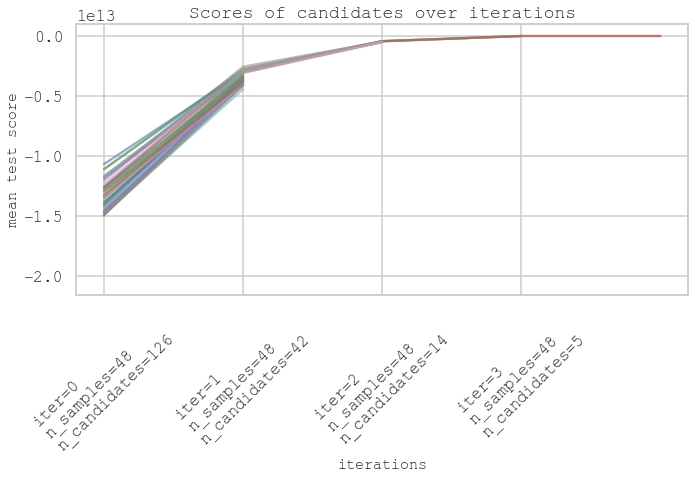

In [57]:
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
fig,ax = plt.subplots(figsize=(10,7))
mean_scores.plot(legend=False, alpha=0.6, ax=ax)

labels = [
    f"iter={i}\nn_samples={results['n_resources'].values[i]}\nn_candidates={len(results[results['iter'] == i].index)}"
    for i in range(max(results['iter']))
]

ax.set_xticks(range(max(results['iter'])))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

In [61]:
lr = -2 * (results.iloc[-1]['mean_test_score'] - results.iloc[-2]['mean_test_score'])
df = sum(results.iloc[-1].filter(regex='param.*') == results.iloc[-2].filter(regex='param.*'))
pval = stats.chi2.pdf(lr , df)
print(atlas, '\tp = ', pval)

destrieux+gordon 	p =  0.0


In [27]:
mean_scores = results.sort_values('mean_train_score', ascending=False)
splits = mean_scores.filter(regex='split.*', axis=1).columns
mean_scores = mean_scores.drop(splits, axis=1)

comparisons = pd.DataFrame(columns=['lambda', 'p(lambda)'],
                           index=pd.MultiIndex.from_product((mean_scores.index, mean_scores.index)))

for i in range(0, len(mean_scores.index)):
    try:
        index1 = mean_scores.index[i]
        index2 = mean_scores.index[i+1]
        lr1 = mean_scores.loc[index1]['mean_train_score']
        lr2 = mean_scores.loc[index2]['mean_train_score']
        lambda_lr = -2 * (lr2 - lr1)
        comparisons.at[(f'{index2}',f'{index1}'),'lambda'] = lambda_lr
        if mean_scores.loc[index1]['param_n_components'] == mean_scores.loc[index2]['param_n_components']:
            df = 1
        else:
            df = abs(mean_scores.loc[index1]['param_n_components'] - mean_scores.loc[index2]['param_n_components'])
        pval = stats.chi2.pdf(lambda_lr , df)
        comparisons.at[(f'{index2}',f'{index1}'),'p(lambda)'] = pval
    except Exception as e:
        print(e)
comparisons = comparisons.dropna(how='all')

index 189 is out of bounds for axis 0 with size 189


In [28]:
comparisons

,,lambda,p(lambda)
104,122,65.673774,0.0
115,104,40.908663,0.0
101,115,1.513559,0.152141
105,101,25.386676,0.0
119,105,11.174706,0.000447
...,...,...,...
182,183,12.680675,0.000198
184,182,52.527501,0.0
185,184,229.462923,0.0
188,185,1001.519308,0.0


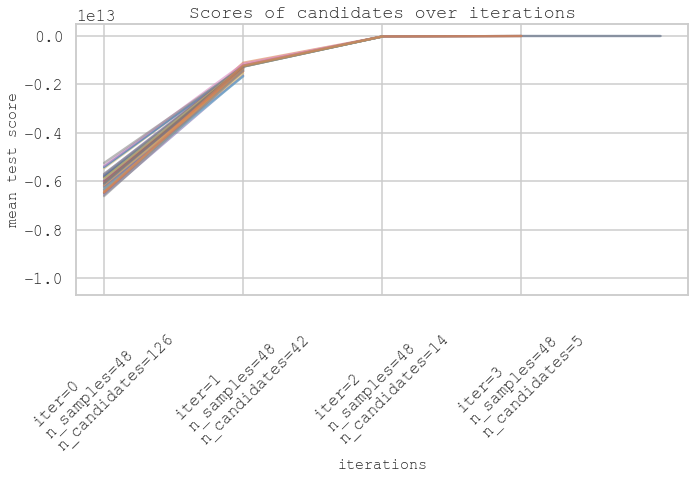

desikankillany 	p =  2.886636121288725e-28
Best model:  {'n_components': 2, 'weight_concentration_prior': 100, 'weight_concentration_prior_type': 'dirichlet_distribution'}
Second best:  {'n_components': 2, 'weight_concentration_prior': 100000, 'weight_concentration_prior_type': 'dirichlet_process'}


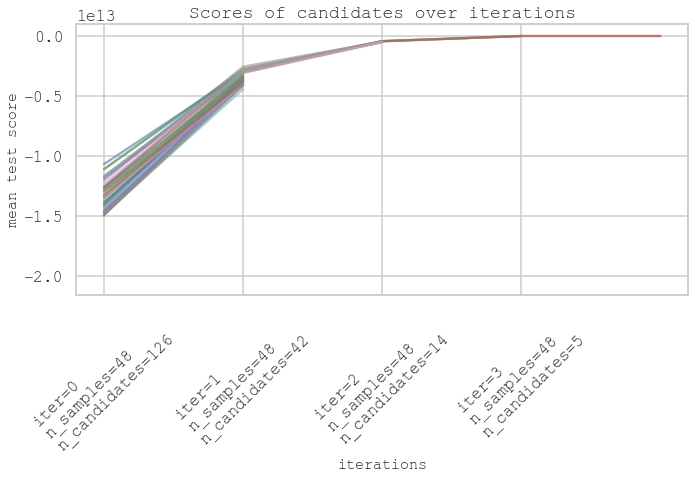

destrieux+gordon 	p =  0.0
Best model:  {'n_components': 2, 'weight_concentration_prior': 1000, 'weight_concentration_prior_type': 'dirichlet_process'}
Second best:  {'n_components': 2, 'weight_concentration_prior': 100, 'weight_concentration_prior_type': 'dirichlet_process'}


In [65]:
for atlas in atlases:
    results = pd.read_csv(join(PROJ_DIR, 
                        OUTP_DIR, 
                        f'bgmm_{atlas}_cv-results.csv'), 
                          index_col=0, 
                          header=0)
    best_params = pd.read_csv(join(PROJ_DIR,
                            OUTP_DIR,
                            f'bgmm_{atlas}_best-model.csv'), 
                              index_col=0, 
                              header=0)
    
    results["params_str"] = results.params.apply(str)
    results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
    mean_scores = results.pivot(
        index="iter", columns="params_str", values="mean_test_score"
    )
    fig,ax = plt.subplots(figsize=(10,7))
    mean_scores.plot(legend=False, alpha=0.6, ax=ax)

    labels = [
        f"iter={i}\nn_samples={results['n_resources'].values[i]}\nn_candidates={len(results[results['iter'] == i].index)}"
        for i in range(max(results['iter']))
    ]

    ax.set_xticks(range(max(results['iter'])))
    ax.set_xticklabels(labels, rotation=45, multialignment="left")
    ax.set_title("Scores of candidates over iterations")
    ax.set_ylabel("mean test score", fontsize=15)
    ax.set_xlabel("iterations", fontsize=15)
    plt.tight_layout()
    plt.show()
    lr = -2 * (results.iloc[-1]['mean_test_score'] - results.iloc[-2]['mean_test_score'])
    df = sum(results.iloc[-1].filter(regex='param.*') == results.iloc[-2].filter(regex='param.*'))
    pval = stats.chi2.pdf(lr , df)
    print(atlas, '\tp = ', pval)
    print('Best model: ', results.iloc[-1]['params_str'])
    print('Second best: ', results.iloc[-2]['params_str'])
    fig.savefig(join(PROJ_DIR, FIGS_DIR, f'{atlas}-log_likelihood-gridsearch.png'), 
                 dpi=400)

In [66]:
results

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,param_weight_concentration_prior,param_weight_concentration_prior_type,params,...,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score,params_str
0,0,48,0.980389,0.034042,0.009247,0.002737,2,0.1,dirichlet_process,"{'n_components': 2, 'weight_concentration_prio...",...,8698.056518,8402.891487,8357.617683,8349.379311,8567.979629,8354.717934,8350.166053,8441.808626,125.870448,"{'n_components': 2, 'weight_concentration_prio..."
1,0,48,0.980891,0.025146,0.008662,0.001486,2,0.1,dirichlet_distribution,"{'n_components': 2, 'weight_concentration_prio...",...,8363.583381,8698.102252,8484.715011,8672.063373,8727.498056,8708.056147,8399.634212,8576.308463,138.084731,"{'n_components': 2, 'weight_concentration_prio..."
2,0,48,0.993679,0.037573,0.009457,0.001512,2,1.0,dirichlet_process,"{'n_components': 2, 'weight_concentration_prio...",...,8363.571052,8353.403063,8615.701192,8683.834017,8354.223239,8404.165427,8509.306313,8491.170479,137.565538,"{'n_components': 2, 'weight_concentration_prio..."
3,0,48,0.979323,0.035872,0.010028,0.003702,2,1.0,dirichlet_distribution,"{'n_components': 2, 'weight_concentration_prio...",...,8621.684340,8567.161957,8407.087879,8724.040379,8445.193660,8720.905149,8694.843696,8603.042798,114.777840,"{'n_components': 2, 'weight_concentration_prio..."
4,0,48,0.973533,0.074973,0.010351,0.003075,2,10.0,dirichlet_process,"{'n_components': 2, 'weight_concentration_prio...",...,8621.489131,8353.222808,8357.417472,8658.414573,8663.280513,8688.995712,8349.963776,8489.846701,143.081681,"{'n_components': 2, 'weight_concentration_prio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,3,1296,2.608113,0.029068,0.032846,0.008133,2,10.0,dirichlet_process,"{'n_components': 2, 'weight_concentration_prio...",...,-995.197039,-1050.287223,-1114.465095,-1049.862086,-1073.275910,-1089.514289,-3057.006149,-1269.200241,598.082589,"{'n_components': 2, 'weight_concentration_prio..."
185,3,1296,2.561776,0.031832,0.029253,0.004951,2,100.0,dirichlet_process,"{'n_components': 2, 'weight_concentration_prio...",...,-3067.945518,-1043.981777,-966.228869,-3081.880886,-1088.071026,-3067.148053,-973.379115,-1838.236108,1011.551809,"{'n_components': 2, 'weight_concentration_prio..."
186,3,1296,2.385957,0.282902,0.035036,0.006949,2,1000.0,dirichlet_distribution,"{'n_components': 2, 'weight_concentration_prio...",...,-1027.257018,-1004.907766,-1015.794356,-1049.861168,-1105.551467,-1089.516406,-1139.605399,-1055.801608,47.503881,"{'n_components': 2, 'weight_concentration_prio..."
187,4,3888,5.915951,0.120213,0.086383,0.010362,2,100.0,dirichlet_process,"{'n_components': 2, 'weight_concentration_prio...",...,-4019.072931,-4045.525142,-4048.685252,-4047.880814,-4016.969456,-4017.778070,-4046.607459,-4034.765358,13.091221,"{'n_components': 2, 'weight_concentration_prio..."


In [ ]:
from scipy import stats
stats.chi2.pdf(-4.553390852561279 , 1)

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='param_n_components', 
              y='value', 
              data=long_results, 
              hue='param_weight_concentration_prior_type',
              ax=ax)

ax.set_ylabel('log likelihood')
sns.lineplot(x='param_n_components', 
             y='value', 
             data=long_results2, 
             ax=ax)

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='param_weight_concentration_prior', 
             y='value', 
             data=long_results, 
             ax=ax)